<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>Indicium - Desafio Cientista de Dados</h1>
</div>

### Nome: Hugo Santos da Costa Bessa
### Github: https://github.com/hugosantosbessa
### LinkedIn: https://www.linkedin.com/in/hugo-bessa/

<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>Summary <a id='summary'></a> </h1>
</div>

# [1. Introduction](#introduction)
# [2. Objective](#objective)
# [3. Dataset Description](#dataset_description)
# [4. First Steps](#first_steps)
# [5. Data Cleaning](#data_cleaning)
# [6. Data Visualization](#data_visualization)
# [7. Predictive Modeling and Evaluation](#predictive_modeling)
# [8. Questions](#questions)


<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>1. Introduction <a id='introduction'></a></h1>
    <p><a href="#summary">Back to top</a></p>
</div>

<div style="text-align:justify; font-size:16px;">
You've been assigned to an Indicium team hired by a Hollywood studio called PProductions, and now you're tasked with analyzing a cinematic database to determine which type of film should be developed next. Remember, there's a lot of money involved, so the analysis must be very detailed and take into account as many factors as possible (introducing external data is permitted—and encouraged).
</div>

<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>2. Objective <a id='objective'></a></h1>
    <p><a href="#summary">Back to top</a></p>
</div>

<div style="text-align:justify; font-size:16px;">
The objective of the challenge is to perform an exploratory analysis of the data and apply predictive models to predict the IMDB rating of films, based on several characteristics.
</div>

<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>3. Dataset Description <a id='dataset_description'></a></h1>
    <p><a href="#summary">Back to top</a></p>
</div>

<div style="text-align:justify; font-size:16px;">
    <ul>
        <li><strong>Series_Title:</strong> Movie name.</li>
        <li><strong>Released_Year:</strong> Year the movie was released.</li>
        <li><strong>Certificate:</strong> Movie rating.</li>
        <li><strong>Runtime:</strong> Movie length in minutes.</li>
        <li><strong>Genre:</strong> Movie genre.</li>
        <li><strong>IMDB_Rating:</strong> Movie rating on IMDB.</li>
        <li><strong>Overview:</strong> Movie description or summary.</li>
        <li><strong>Meta_score:</strong> Weighted average of reviews received by the movie.</li>
        <li><strong>Director:</strong> Name of the movie's director.</li>
        <li><strong>Star1:</strong> First lead actor/actress.</li>
        <li><strong>Star2:</strong> Second lead actor/actress.</li>
        <li><strong>Star3:</strong> Third lead actor/actress.</li>
        <li><strong>Star4:</strong> Fourth lead actor/actress.</li>
        <li><strong>No_of_Votes:</strong> Number of votes on IMDB.</li>
        <li><strong>Gross:</strong> Movie's gross box office.</li>
    </ul>
</div>


<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>4. First Steps <a id='first_steps'></a> </h1>
    <p><a href="#summary">Back to top</a></p>
</div>

### Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### Read the Dataset

In [2]:
movies_imdb = pd.read_csv('desafio_indicium_imdb.csv')

### Rename columns

In [3]:
print(movies_imdb.columns)
# rename the unnamed column to "id"
movies_imdb.rename(columns={movies_imdb.columns[0]: 'id', movies_imdb.columns[1]: 'Movie_Title'}, inplace=True)
movies_imdb

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


,id,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


### Get Information About the Dataset

In [4]:
print(movies_imdb.dtypes)
num_tuples = movies_imdb.shape[0]
print(f"Number of tuples: {num_tuples}")
storage_space = movies_imdb.memory_usage().sum()
print(f"Storage space: {storage_space/1000000} MB")

id                 int64
Movie_Title       object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object
Number of tuples: 999
Storage space: 0.128 MB


<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>5. Data Cleaning <a id='data_cleaning'></a></h1>
    <p><a href="#summary">Back to top</a></p>    
</div> 

### Duplicates

In [5]:
movies_imdb[movies_imdb.duplicated()]

,id,Movie_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


### Null Data

In [6]:
print(movies_imdb.isnull().sum())

id                 0
Movie_Title        0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


### Convert the column Runtime to float

In [7]:
movies_imdb["Runtime"] = movies_imdb["Runtime"].str.extract(r"(\d+)").astype(float)

### Convert the column Released_Year to int
#### In the row id 966 of film Apollo 13, the column Released_year is "PG", so it renamed for with the correct year

In [8]:
movies_imdb.loc[movies_imdb['Movie_Title'] == 'Apollo 13', 'Released_Year'] = 1995
movies_imdb['Released_Year'] = movies_imdb['Released_Year'].astype(int)

### Convert the column Gross to Float
#### The values in column Gross are String of numbers, and these numbers are separetes with ",", so replace it and transform to float

In [9]:
if movies_imdb['Gross'].dtype != 'float64':
    movies_imdb['Gross'] = movies_imdb['Gross'].str.replace(',', '').astype(float)

### Fill the column Certificate
#### Fill in the missing data with "Unrated", which means these are films that have not yet been certified.

In [10]:
movies_imdb["Certificate"] = movies_imdb["Certificate"].fillna("Unrated")
print(movies_imdb['Certificate'].value_counts())

Certificate
U           234
A           196
UA          175
R           146
Unrated     102
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-MA         1
16            1
TV-14         1
U/A           1
Name: count, dtype: int64


### Fill the column Meta_score
#### To fill in the missing data in the Meta_score column, calculate the average of the difference between the IMDB_Rating and Meta_score columns.

In [11]:
# Filtered a new dataset without the NaN values
movies_imbd_no_nan = movies_imdb.dropna(subset=['Meta_score']).copy()
# Creates a new column Meta_score_div_10 so that it is on the same scale as the IMDB_Rating column
movies_imbd_no_nan['Meta_score_div_10'] = movies_imbd_no_nan['Meta_score'] / 10

# Count how many times higher IMDb is and how many times higher Metascore is
movies_imbd_no_nan['IMDB_is_bigger'] = movies_imbd_no_nan['IMDB_Rating'] > movies_imbd_no_nan['Meta_score_div_10']  # True if IMDb > Metascore, False otherwise
ctd_imdb_higher = movies_imbd_no_nan['IMDB_is_bigger'].sum()  
ctd_metascore_higher = len(movies_imbd_no_nan) - ctd_imdb_higher
print(f'Number of times IMDb is higher: {ctd_imdb_higher} - %{100*ctd_imdb_higher/len(movies_imbd_no_nan):.1f}')
print(f'Number of times Metascore is higher: {ctd_metascore_higher} - %{100*ctd_metascore_higher/len(movies_imbd_no_nan):.1f}')

# Calculate the absolute difference between IMDb and Metascore
movies_imbd_no_nan['Difference_IMDB_Meta'] = abs(movies_imbd_no_nan['IMDB_Rating'] - movies_imbd_no_nan['Meta_score_div_10'])

# Calculate the mean of the difference
avg_variation = movies_imbd_no_nan['Difference_IMDB_Meta'].mean()

print(f'The average variation between IMDb and Metascore ratings is: {avg_variation}')
np.random.seed(42)
def fill_metascore(row):
    if pd.isna(row['Meta_score']):
        # 50% chance of adding or subtracting the average IMDb variation
        fit = avg_variation * np.random.choice([1, -1])
        return round(row['IMDB_Rating'] * 10 + fit)
    return row['Meta_score']


movies_imdb['Meta_score'] = movies_imdb.apply(fill_metascore, axis=1)

Number of times IMDb is higher: 408 - %48.5
Number of times Metascore is higher: 434 - %51.5
The average variation between IMDb and Metascore ratings is: 0.9473871733966747


### Fill the column Gross
#### To fill in the missing data values in the Gross column, calculate the average gross revenue value per decade (the year or period in which the movies was released can influence the movies's revenue in different ways).

In [12]:
movies_imdb['Released_Decade'] = (movies_imdb['Released_Year'] // 10) * 10
avg_gross_decade = movies_imdb.groupby('Released_Decade')['Gross'].mean()
# Movies after 2019 do not have gross revenue data, so the average from the 2010s is repeated in the 2020s.
avg_gross_decade[2020] = avg_gross_decade[2010]
print(avg_gross_decade)
movies_imdb['Gross'] = movies_imdb['Gross'].fillna(
    movies_imdb['Released_Decade'].map(avg_gross_decade)
)

Released_Decade
1920    1.844978e+06
1930    1.840348e+07
1940    8.293462e+06
1950    1.417469e+07
1960    3.163478e+07
1970    5.287953e+07
1980    6.231487e+07
1990    6.226926e+07
2000    6.965808e+07
2010    1.037204e+08
2020    1.037204e+08
Name: Gross, dtype: float64


### Double-check that all data has been processed

In [13]:
print(movies_imdb.isnull().sum())

id                 0
Movie_Title        0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
Released_Decade    0
dtype: int64


### Save the new csv

In [14]:
movies_imdb.to_csv('imdb_movies.csv', index=False)


<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>6. Data Visualization <a id='data_visualization'></a></h1>
    <p><a href="#summary">Back to top</a></p>  
</div> 


### Functions for viewing data

In [15]:
def plot_bar_chart(x, y, title, xlabel, ylabel, palette='husl', legend=True, hue=None, order=None):
    """
    Function to create a bar chart with Seaborn and Matplotlib.

    Parameters:
    - x: Data for the X-axis.
    - y: Data for the Y-axis.
    - title: Chart title.
    - xlabel: X-axis label.
    - ylabel: Y-axis label.
    - palette: Color palette for the chart (optional, default 'husl').
    - legend: Whether to display a legend (optional, default True).
    - hue: Whether to use 'hue' in the chart (optional, default y).
    - order: Order to plot the categorical levels in; otherwise the levels are inferred from the data objects. 
    """
    
    if hue == None:
        hue = y
    fig, axs = plt.subplots(figsize=(21, 7))
    ax = sns.barplot(x=x, y=y, palette=palette, hue=hue, legend='full', order=order)
    ax.set_title(title, weight="bold", fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    
    if legend:
        ax.legend(framealpha=0.4)
    

### Description of numerical data

In [16]:
movies_imdb[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime', 'Released_Year']].describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime,Released_Year
count,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000
mean,7.947948,78.348348,2.716214e+05,6.505730e+07,122.871872,1991.218218
std,0.272290,11.434959,3.209126e+05,1.012531e+08,28.101227,23.297166
min,7.600000,28.000000,2.508800e+04,1.305000e+03,45.000000,1920.000000
25%,7.700000,72.000000,5.547150e+04,4.897939e+06,103.000000,1976.000000
50%,7.900000,80.000000,1.383560e+05,2.913300e+07,119.000000,1999.000000
75%,8.100000,86.000000,3.731675e+05,7.633928e+07,137.000000,2009.000000
max,9.200000,100.000000,2.303232e+06,9.366622e+08,321.000000,2020.000000


### IMDB_Rating column description grouped by decade (Released_Decade column)

In [17]:
movies_imdb.groupby('Released_Decade')['IMDB_Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Released_Decade,,,,,,,,
1920,11.0,8.127273,0.119087,7.9,8.100,8.1,8.200,8.3
1930,24.0,7.966667,0.225864,7.6,7.800,7.9,8.100,8.5
1940,35.0,8.025714,0.224057,7.6,7.900,8.0,8.100,8.6
1950,56.0,8.058929,0.255682,7.6,7.900,8.0,8.200,9.0
1960,73.0,7.973973,0.255510,7.6,7.800,8.0,8.100,8.8
1970,76.0,7.969737,0.309847,7.6,7.700,7.9,8.100,9.2
1980,89.0,7.953933,0.258956,7.6,7.700,7.9,8.100,8.7
1990,150.0,7.952000,0.315531,7.6,7.700,7.9,8.100,8.9
2000,237.0,7.899578,0.267046,7.6,7.700,7.8,8.000,9.0


### Histograms of numerical data

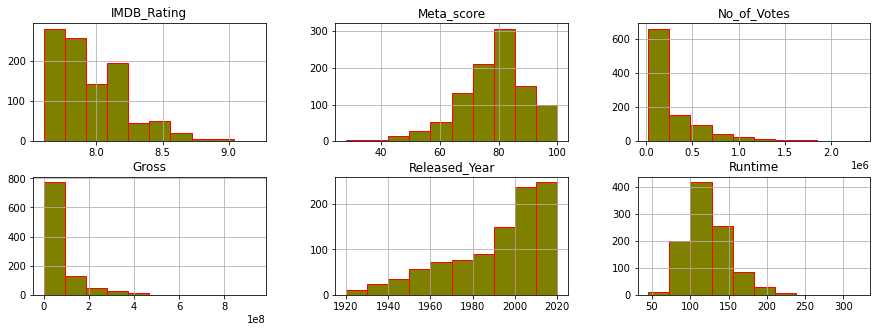

In [18]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Released_Year', 'Runtime']
movies_imdb[numerical_attributes].hist(figsize = (15, 5), color = 'olive', edgecolor = 'red', layout = (2, 3));

### Correlation between numeric columns

In [19]:
corr = movies_imdb[['IMDB_Rating','Meta_score','No_of_Votes','Gross', 'Released_Year', 'Runtime']].corr()
corr.style.background_gradient(cmap='RdYlGn', axis=None).format(precision=2)

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Released_Year,Runtime
IMDB_Rating,1.00,0.29,0.48,0.09,-0.13,0.24
Meta_score,0.29,1.00,-0.04,-0.06,-0.30,-0.02
No_of_Votes,0.48,-0.04,1.00,0.58,0.25,0.17
Gross,0.09,-0.06,0.58,1.00,0.27,0.15
Released_Year,-0.13,-0.30,0.25,0.27,1.00,0.17
Runtime,0.24,-0.02,0.17,0.15,0.17,1.00


### Line graph of the highest grossing film by year

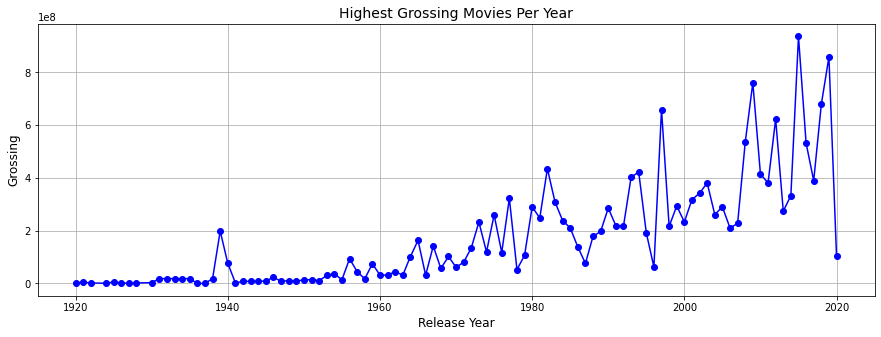

In [20]:
# Group by year of release and get the maximum gross revenue for each year
maximum_gross_year = movies_imdb.groupby('Released_Year')['Gross'].max()

plt.figure(figsize=(15, 5))
plt.plot(maximum_gross_year.index, maximum_gross_year.values, marker='o', linestyle='-', color='b')
plt.title('Highest Grossing Movies Per Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Grossing', fontsize=12)
plt.grid(True)
plt.show()

### Line graph of the highest grossing film by Decade

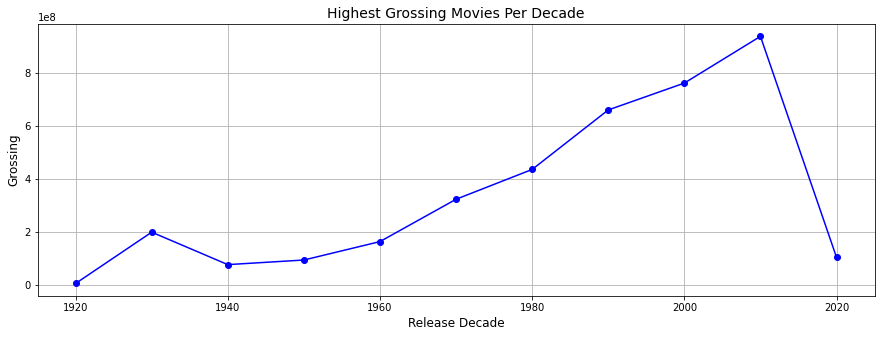

In [21]:
faturamento_decada_maxima = movies_imdb.groupby('Released_Decade')['Gross'].max()

plt.figure(figsize=(15, 5))
plt.plot(faturamento_decada_maxima.index, faturamento_decada_maxima.values, marker='o', linestyle='-', color='b')
plt.title('Highest Grossing Movies Per Decade', fontsize=14)
plt.xlabel('Release Decade', fontsize=12)
plt.ylabel('Grossing', fontsize=12)
plt.grid(True)
plt.show()

### Line graph of the highest number of votes for a film by decade

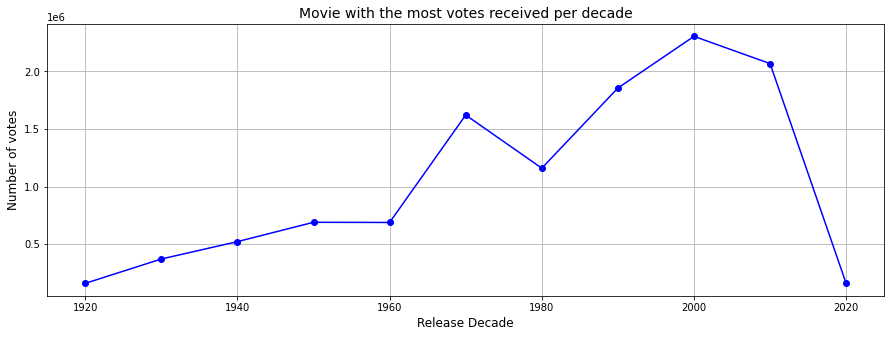

In [22]:
num_votos_max = movies_imdb.groupby('Released_Decade')['No_of_Votes'].max()

plt.figure(figsize=(15, 5))
plt.plot(num_votos_max.index, num_votos_max.values, marker='o', linestyle='-', color='b')
plt.title('Movie with the most votes received per decade', fontsize=14)
plt.xlabel('Release Decade', fontsize=12)
plt.ylabel('Number of votes', fontsize=12)
plt.grid(True)
plt.show()

### Density graph of the duration of movies

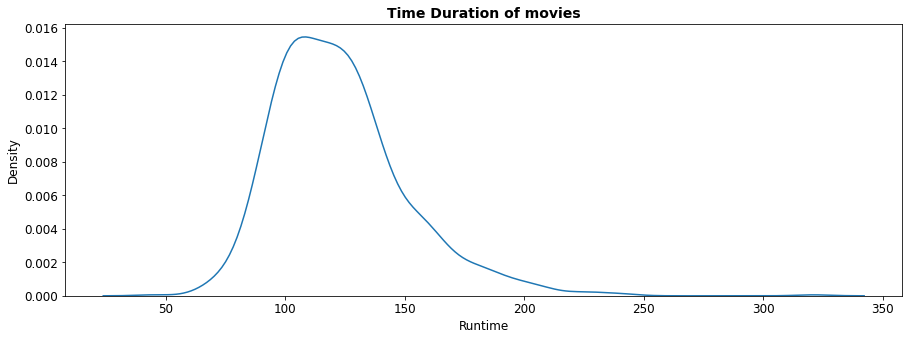

In [23]:
fig,axs = plt.subplots(figsize=(15,5))
ax = sns.kdeplot(movies_imdb['Runtime'])
ax.set_xlabel('Runtime', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title("Time Duration of movies", weight = "bold", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
plt.show()

### Description of non-numeric data

In [24]:
movies_imdb.describe(include = ['O'])

,Movie_Title,Certificate,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,999,999,999,999,999,999,999,999,999
unique,998,16,202,999,548,659,840,890,938
top,Drishyam,U,Drama,A man in London tries to help a counter-espion...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,2,234,84,1,14,12,7,5,4


## Analysis of the 10 films with the highest number of votes

### Sort by ascending order of number of votes

In [25]:
top_voted = movies_imdb.sort_values(['No_of_Votes'], ascending=False)

### Bar graph of the most voted films

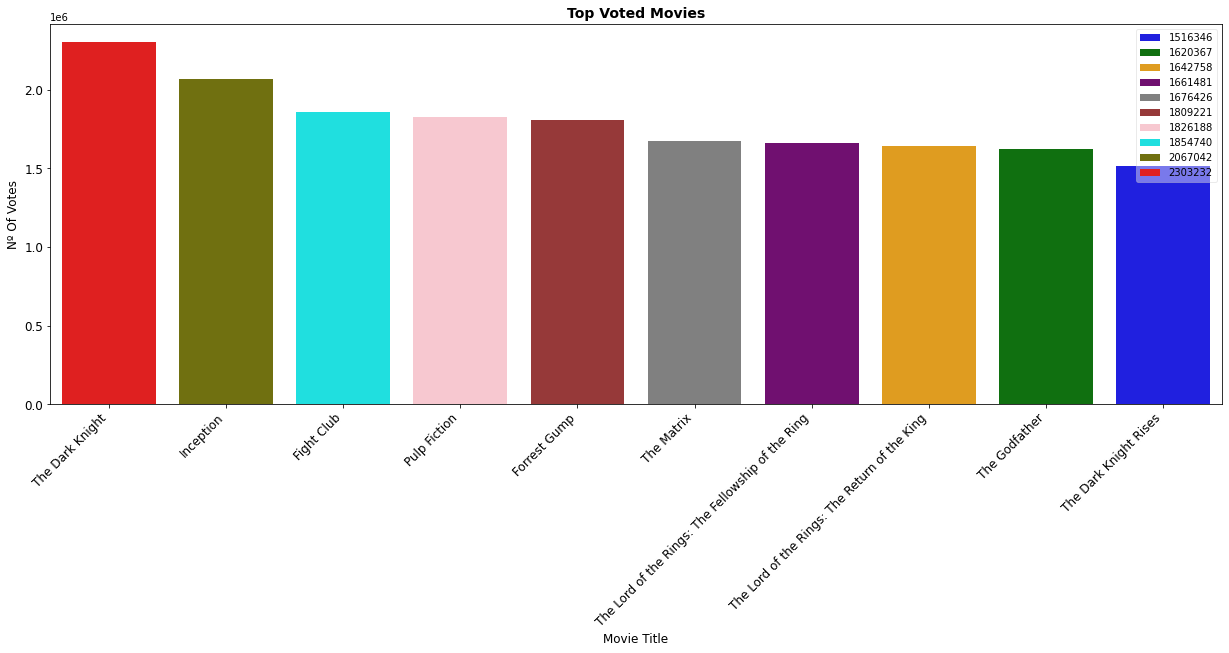

In [26]:
x = top_voted['Movie_Title'][:10]
y = top_voted['No_of_Votes'][:10]
plot_bar_chart(x, y, title="Top Voted Movies", xlabel="Movie Title", ylabel="Nº Of Votes", 
               palette=['blue', 'green', 'orange', 'purple', 'gray', 'brown', 'pink', 'cyan', 'olive', 'red'])
plt.xticks(rotation=45, ha="right")
plt.show()

### Bar graph of IMDB ratings for top-rated movies

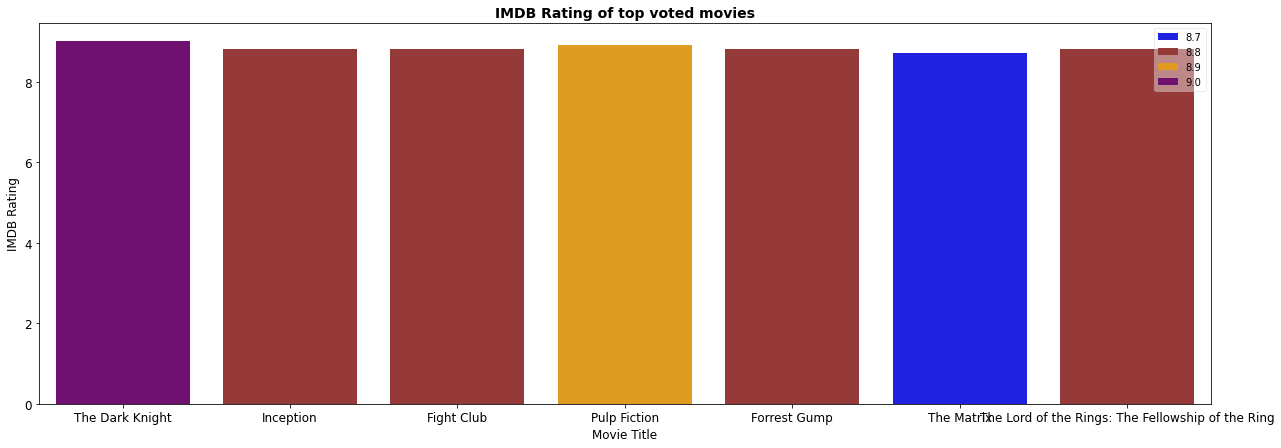

In [27]:
x = top_voted['Movie_Title'][:7]
y = top_voted['IMDB_Rating'][:7]
plot_bar_chart(x, y, title="IMDB Rating of top voted movies", xlabel="Movie Title", ylabel="IMDB Rating", 
               palette=['blue', 'brown', 'orange', 'purple'])
plt.show()

### Bar graph of the Metascore ratings of the most voted films

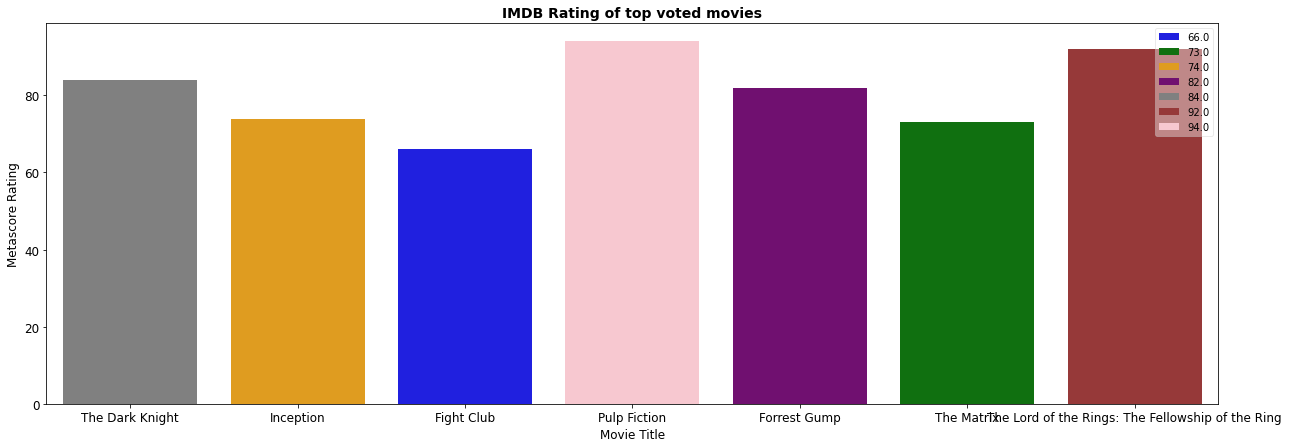

In [28]:
x = top_voted['Movie_Title'][:7]
y = top_voted['Meta_score'][:7]
plot_bar_chart(x, y, title="IMDB Rating of top voted movies", xlabel="Movie Title", ylabel="Metascore Rating", 
               palette=['blue', 'green', 'orange', 'purple', 'gray', 'brown', 'pink'])
plt.show()

### Mostly Occurred Directors

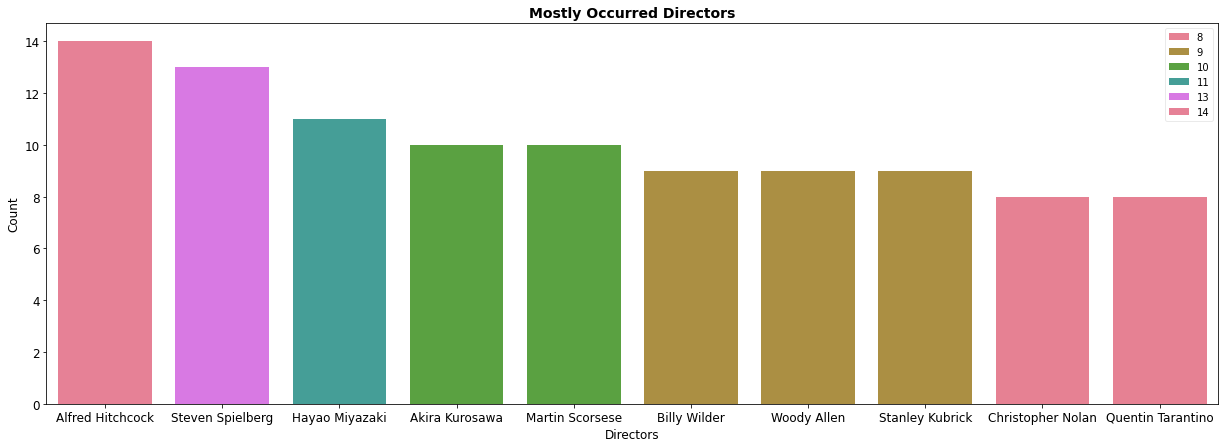

In [29]:
director_counts = movies_imdb['Director'].value_counts()[:10]
x = director_counts.index
y = director_counts
plot_bar_chart(x, y, title="Mostly Occurred Directors", xlabel="Directors", ylabel="Count")
plt.show()

### Mostly Occurred Actors

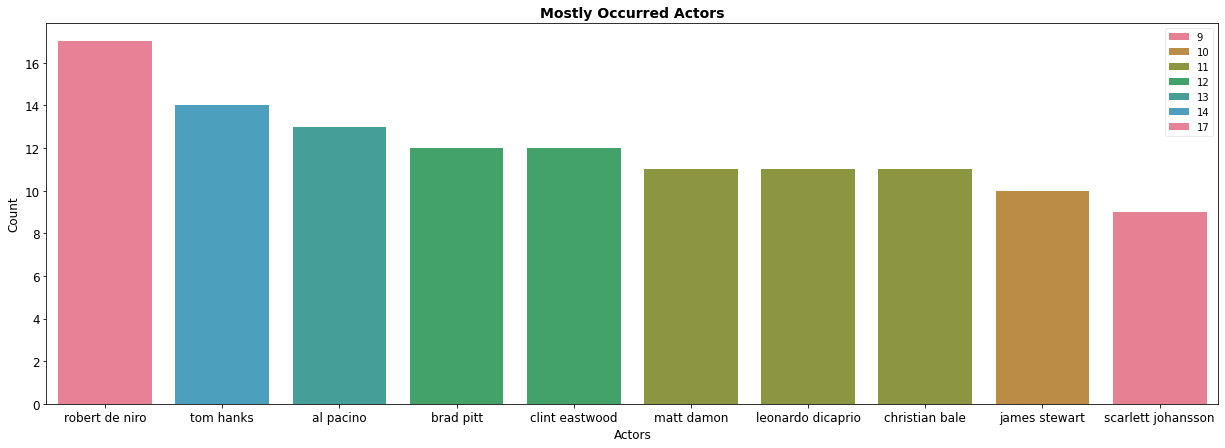

In [30]:
stars=['Star1','Star2','Star3','Star4']    
actors=[]
for x in stars:
    for y in movies_imdb[x]:
        actors.append(y.strip().lower())
        
actor_df = pd.DataFrame({'Actor': actors})
actors_count = actor_df['Actor'].value_counts()[:10]
x = actors_count.index
y = actors_count
plot_bar_chart(x, y, title="Mostly Occurred Actors", xlabel="Actors", ylabel="Count")
plt.show()

### Number of films released in the year

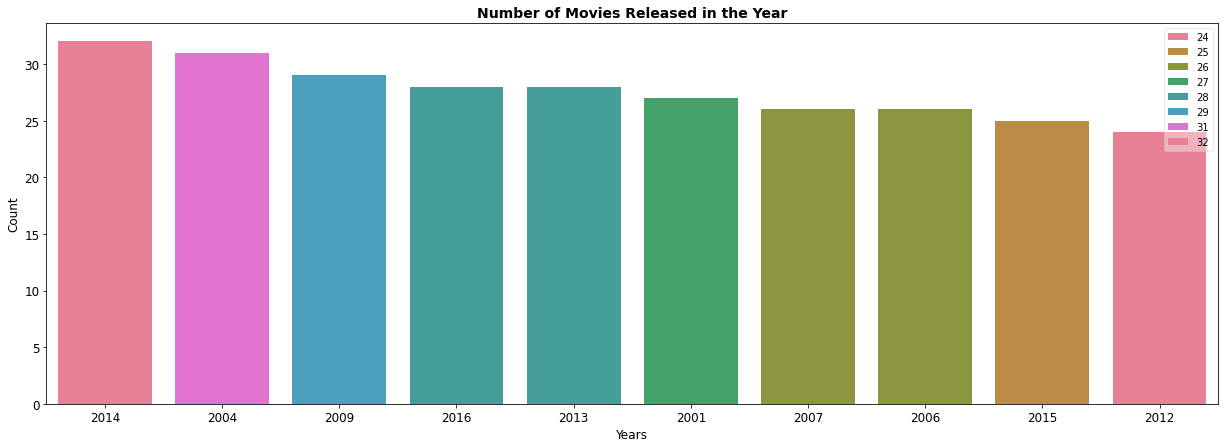

In [31]:
count_by_year = movies_imdb['Released_Year'].value_counts()[:10]
x = count_by_year.index
y = count_by_year
plot_bar_chart(x, y, title="Number of Movies Released in the Year", xlabel="Years", ylabel="Count", order=x)
plt.show()

### Distribution of IMDB Ratings

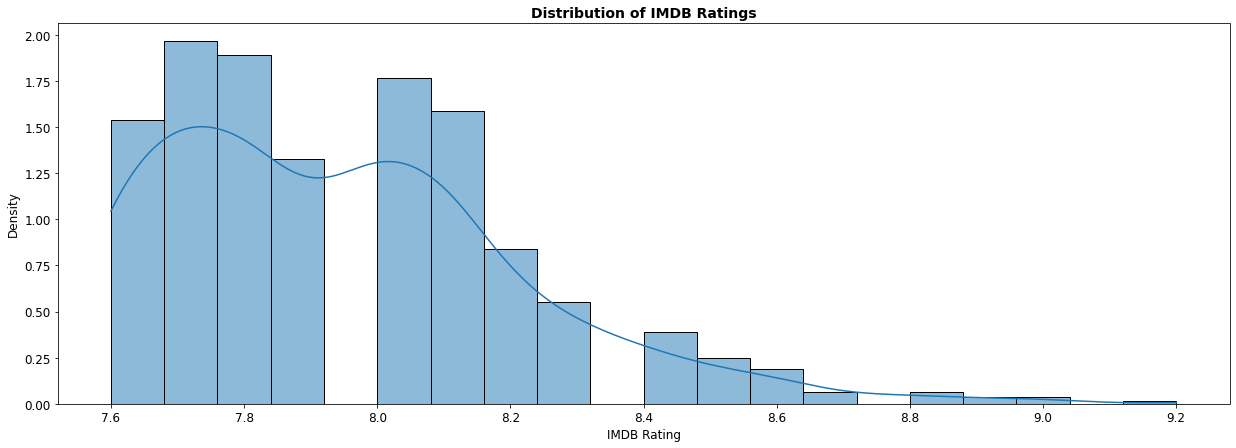

In [32]:
fig,axs=plt.subplots(figsize=(21,7))
ax = sns.histplot(movies_imdb['IMDB_Rating'], kde=True, stat="density")
ax.set_title("Distribution of IMDB Ratings", weight = "bold", fontsize=14)
ax.set_xlabel("IMDB Rating", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
ax.tick_params(axis='both', labelsize=12)
plt.show()

### Highest Frequency of Genres
#### The average IMDB ratings are close for all genres (Min = 7.9 , Max = 8.0)

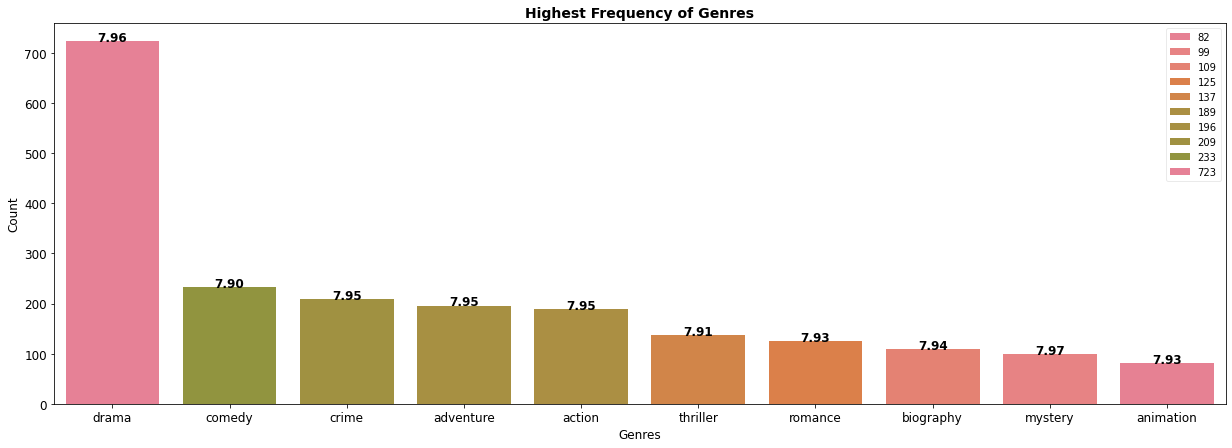

In [33]:
genre = []
imdb_scores = []
meta_scores = []
earnings = []

# Separate genres and associate the IMDB, Metascore and Gross
for idx, row in movies_imdb.iterrows():
    genres = row['Genre'].split(',')
    imdb = row['IMDB_Rating']
    meta = row['Meta_score']
    gross = row['Gross']
    for g in genres:
        genre.append(g.strip().lower()) 
        imdb_scores.append(imdb)
        meta_scores.append(meta)
        earnings.append(gross)
        

genre_df = pd.DataFrame({'Genre': genre, 'IMDB': imdb_scores, 'Metascore' : meta_scores, 'Gross' : earnings})

count = genre_df['Genre'].value_counts().reset_index()
count.columns = ['Genre', 'Count']

imdb_avg = genre_df.groupby('Genre')['IMDB'].mean().reset_index()
imdb_avg.columns = ['Genre', 'Avg_IMDB']

# Merge IMDb count and average information
genre_info = pd.merge(count, imdb_avg, on='Genre')
genre_info = genre_info.sort_values(by='Count', ascending=False)
x = genre_info['Genre'][:10]
y = genre_info['Count'][:10]

plot_bar_chart(x, y, title="Highest Frequency of Genres", xlabel="Genres", ylabel="Count", order=x)
# Show IMDb averages on the graph
for i, v in enumerate(genre_info['Count'].head(10)):
    plt.text(i, v + 0.2, f'{genre_info["Avg_IMDB"].iloc[i]:.2f}', ha='center', fontsize=12, weight='bold')
plt.show()

 ### Chart Pie - Highest Frequency of Genres 

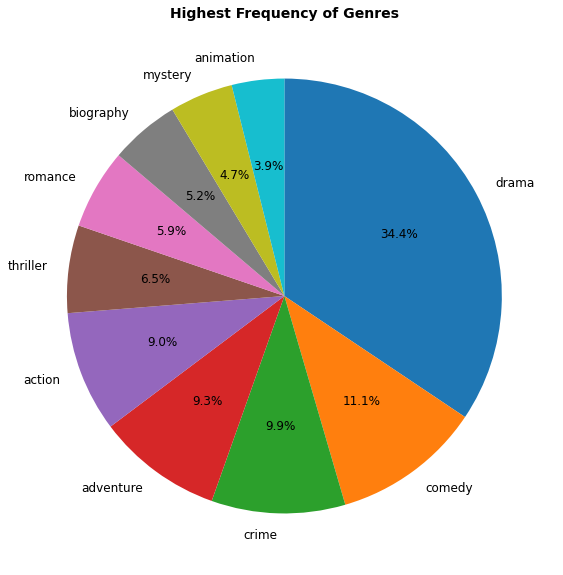

In [34]:
x = genre_info['Genre'][:10]
y = genre_info['Count'][:10]
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(
    y,
    labels=x,
    autopct='%1.1f%%',   
    startangle=90,  
    counterclock=False,
    textprops={'fontsize': 12}
)
ax.set_title('Highest Frequency of Genres', weight="bold", fontsize=14)
plt.show()

### Highest Metascore Averages by Movie Genre

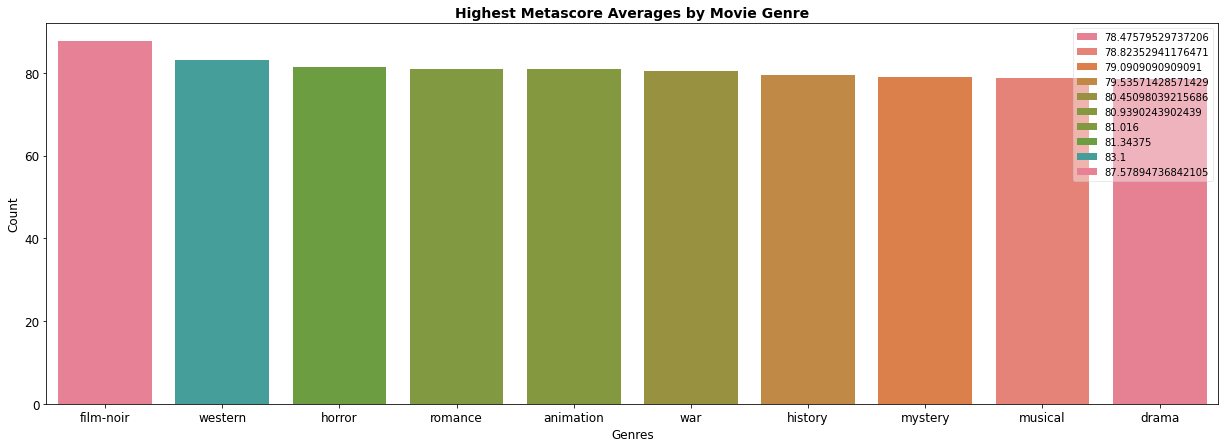

In [35]:
avg_metascore_genre = genre_df.groupby('Genre')['Metascore'].mean().reset_index()
avg_metascore_genre = avg_metascore_genre.sort_values(by='Metascore', ascending=False)
x = avg_metascore_genre['Genre'][:10]
y = avg_metascore_genre['Metascore'][:10]
plot_bar_chart(x, y, title="Highest Metascore Averages by Movie Genre", xlabel="Genres", ylabel="Count", order=x)
plt.show()

### Highest Gross Averages by Movie Genre

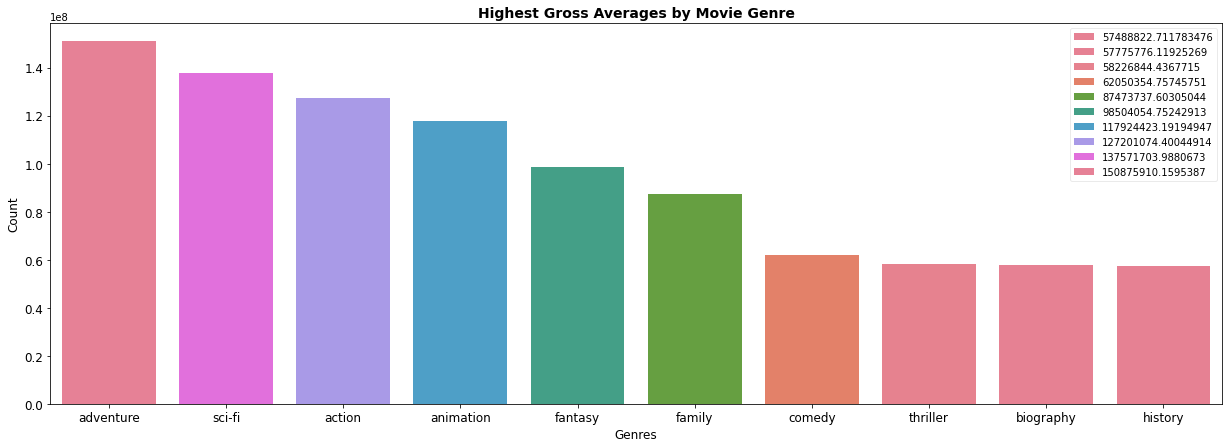

In [36]:
avg_gross_genre = genre_df.groupby('Genre')['Gross'].mean().reset_index()
avg_gross_genre = avg_gross_genre.sort_values(by='Gross', ascending=False)
x = avg_gross_genre['Genre'][:10]
y = avg_gross_genre['Gross'][:10]
plot_bar_chart(x, y, title="Highest Gross Averages by Movie Genre", xlabel="Genres", ylabel="Count", order=x)
plt.show()

<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>7. Predictive Modeling and Evaluation <a id='predictive_modeling'></a></h1>
    <p><a href="#summary">Back to top</a></p>  
</div> 

### Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split

df_model = movies_imdb.copy()
numeric_features = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
categorical_features = ['Certificate', 'Genre', 'Director'] 
target = 'IMDB_Rating'
X = df_model[numeric_features+categorical_features]
y = df_model[target]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree - Analysis Max Depth

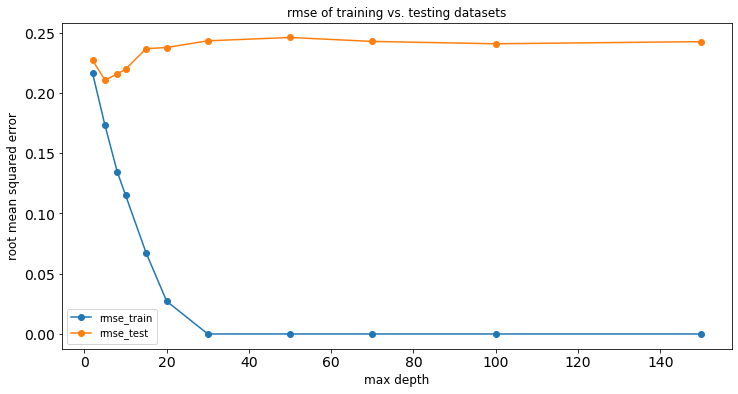

In [38]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt


rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train, y_train)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train)
    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test)
    rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(12,6),title="rmse of training vs. testing datasets", fontsize=14, x='max_depth', marker='o')
ax.set_xlabel("max depth", fontsize=12)
ax.set_ylabel("root mean squared error", fontsize=12)
plt.show()

### Regressive Models (Decision Tree, Gradient Boosting, Random Forest)

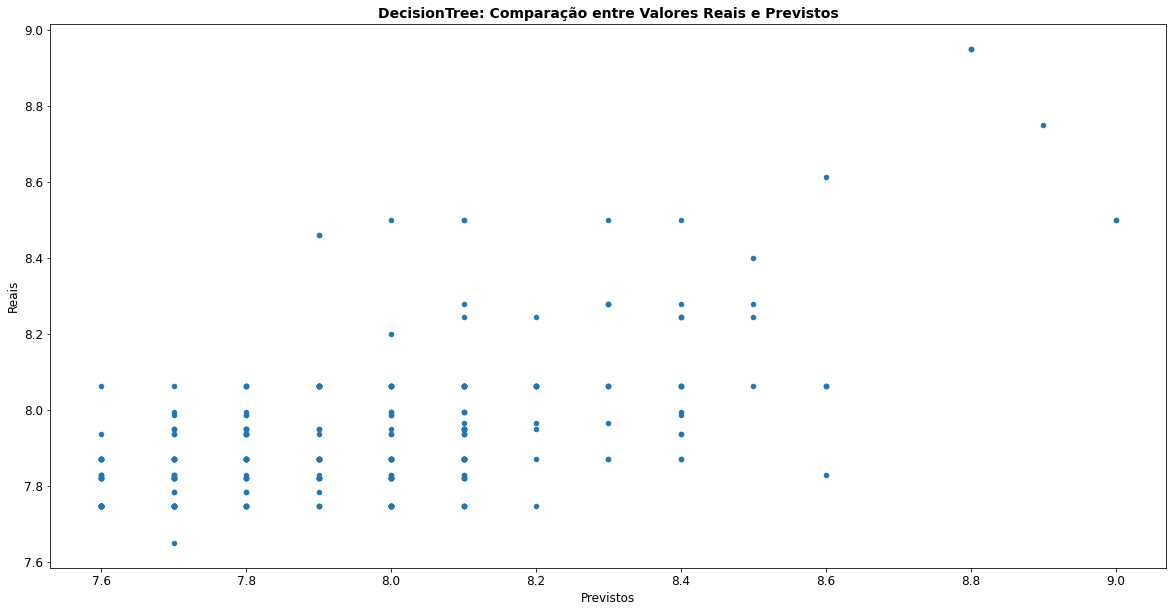

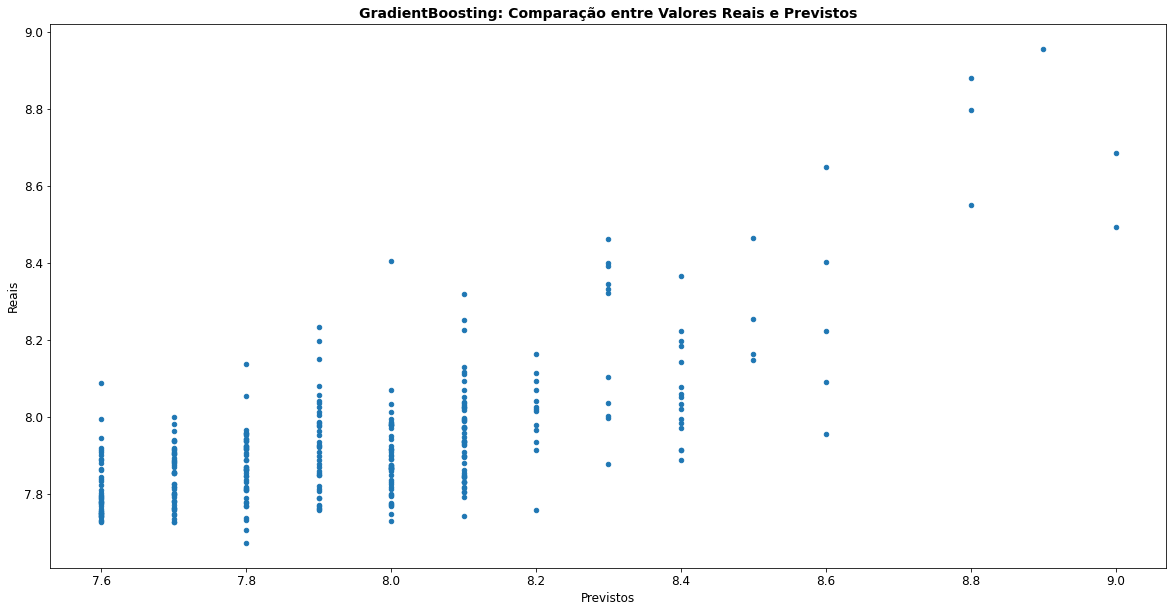

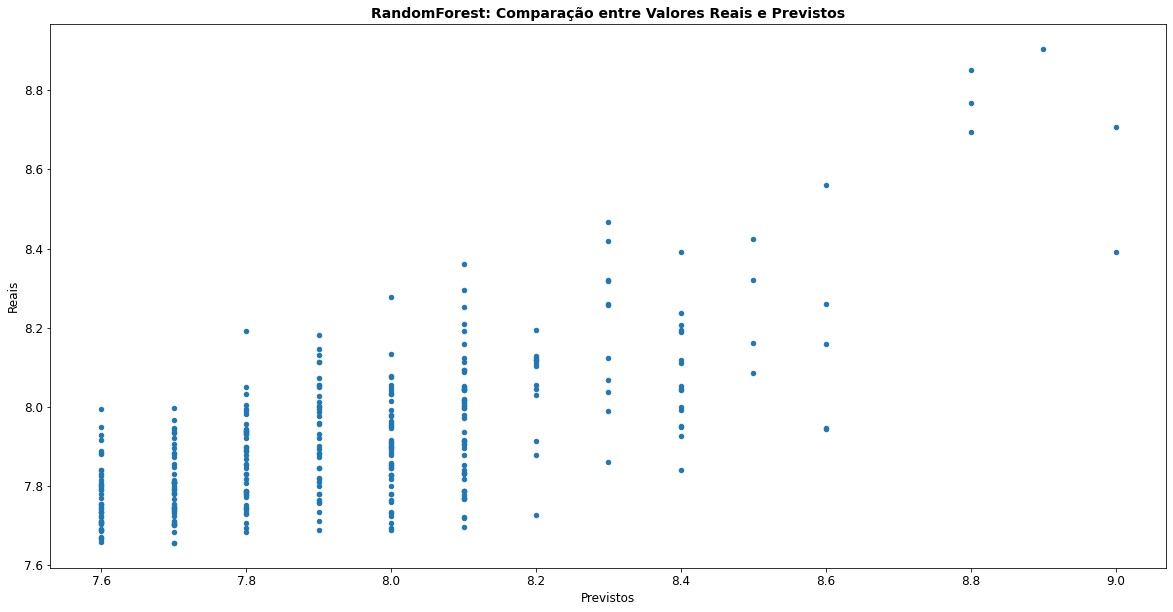

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

pipeline_dt = make_pipeline(
    DecisionTreeRegressor(max_depth=5)
)

pipeline_gb = make_pipeline(
    GradientBoostingRegressor()
)

pipeline_rf = make_pipeline(
    RandomForestRegressor()
)

pipelines = [
    ('DecisionTree', pipeline_dt),
    ('GradientBoosting', pipeline_gb),
    ('RandomForest', pipeline_rf)
]

models = ['DecisionTree', 'GradientBoosting', 'RandomForest'] 
data = {'Modelos': models, 'mean_absolute_error': 0.0, 'mean_squared_error': 0.0,'root_mean_squared_error': 0.0, 'r2': 0.0}
results = pd.DataFrame(data)
results.set_index('Modelos', inplace=True)

for model_name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    results.loc[model_name, 'mean_absolute_error'] = mean_absolute_error(y_test, y_pred)
    results.loc[model_name, 'mean_squared_error'] = mean_squared_error(y_test, y_pred)
    results.loc[model_name, 'root_mean_squared_error'] = sqrt(mean_squared_error(y_test, y_pred))
    results.loc[model_name, 'r2'] = r2_score(y_test, y_pred)
    data = {'true': y_test, 'pred': y_pred}
    df = pd.DataFrame(data)
    ax = df.plot(figsize=(20,10), kind='scatter', x='true', y='pred')
    ax.set_title(f'{model_name}: Comparação entre Valores Reais e Previstos', weight="bold", fontsize=14)
    ax.set_xlabel('Previstos', fontsize=12)
    ax.set_ylabel('Reais', fontsize=12)
    ax.tick_params(axis='both', labelsize=12)    
    plt.show()

### Line graph of model metrics

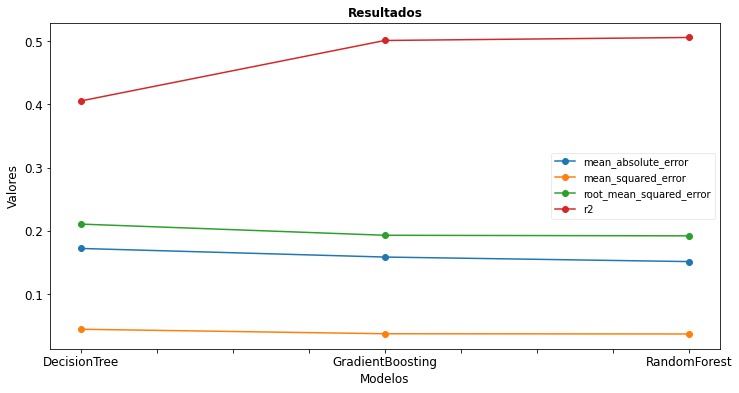

In [40]:
ax = results.plot(figsize=(12,6), kind='line', marker='o')
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.title('Resultados', weight='bold', fontsize=12)
ax.tick_params(axis='both', labelsize=12)  
ax.legend(framealpha=0.4)
plt.show()

### Model metrics table

In [41]:
from tabulate import tabulate
table = tabulate(results, headers='keys', tablefmt='fancy_grid')
print(table)

╒══════════════════╤═══════════════════════╤══════════════════════╤═══════════════════════════╤══════════╕
│ Modelos          │   mean_absolute_error │   mean_squared_error │   root_mean_squared_error │       r2 │
╞══════════════════╪═══════════════════════╪══════════════════════╪═══════════════════════════╪══════════╡
│ DecisionTree     │              0.172143 │            0.0443785 │                  0.210662 │ 0.405282 │
├──────────────────┼───────────────────────┼──────────────────────┼───────────────────────────┼──────────┤
│ GradientBoosting │              0.158524 │            0.0372361 │                  0.192967 │ 0.500998 │
├──────────────────┼───────────────────────┼──────────────────────┼───────────────────────────┼──────────┤
│ RandomForest     │              0.151342 │            0.0368806 │                  0.192043 │ 0.505762 │
╘══════════════════╧═══════════════════════╧══════════════════════╧═══════════════════════════╧══════════╛


### Most important features - Random Forest

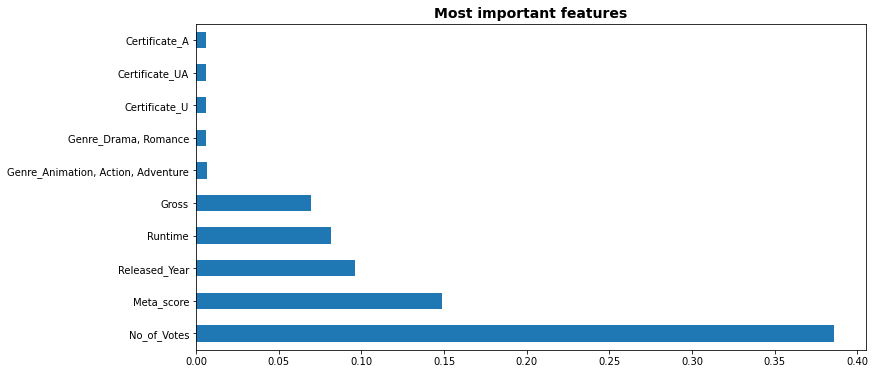

In [42]:
ax = (pd.Series(pipeline_rf[0].feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(figsize=(12,6),kind='barh'))
ax.set_title('Most important features', weight='bold', fontsize=14)
plt.show()

### Saving the model

In [43]:
from joblib import dump, load
dump(pipeline_rf[0], "movies_random_forest.pkl")

['movies_random_forest.pkl']

### Testing the saved model

In [44]:
model_rf = load("movies_random_forest.pkl")
y_pred = model_rf.predict(X_test)
print(model_rf)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

RandomForestRegressor()
mean_absolute_error 0.15134242424242422
mean_squared_error 0.03688060909090893
root_mean_squared_error 0.1920432479701094
r2 0.5057617877394736


### The Shawshank Redemption movie analysis

In [45]:
feature_cols = X_train.columns

data = {
    'Movie_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142.0,
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption...',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469.0,
    'Released_Decade': 1990
}

df = pd.DataFrame([data])
# Add all columns using in the training dataset
df = df.reindex(columns=feature_cols, fill_value=False)
df = df[feature_cols]

# Add true in the categorical columns of the movie
df['Certificate_A'] = True
df['Genre_Drama'] = True
df['Director_Frank Darabont'] = True

In [46]:
df

,Released_Year,Runtime,Meta_score,No_of_Votes,Gross,Certificate_16,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,"Genre_Action, Adventure","Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror","Genre_Action, Adventure, Mystery","Genre_Action, Adventure, Romance","Genre_Action, Adventure, Sci-Fi","Genre_Action, Adventure, Thriller","Genre_Action, Adventure, War","Genre_Action, Adventure, Western","Genre_Action, Biography, Crime","Genre_Action, Biography, Drama","Genre_Action, Comedy, Crime","Genre_Action, Comedy, Fantasy","Genre_Action, Comedy, Mystery","Genre_Action, Comedy, Romance","Genre_Action, Crime, Comedy","Genre_Action, Crime, Drama","Genre_Action, Crime, Mystery","Genre_Action, Crime, Thriller","Genre_Action, Drama","Genre_Action, Drama, History","Genre_Action, Drama, Mystery","Genre_Action, Drama, Sci-Fi","Genre_Action, Drama, Sport","Genre_Action, Drama, Thriller","Genre_Action, Drama, War","Genre_Action, Drama, Western","Genre_Action, Mystery, Thriller","Genre_Action, Sci-Fi","Genre_Action, Sci-Fi, Thriller","Genre_Action, Thriller","Genre_Adventure, Biography, Crime","Genre_Adventure, Biography, Drama","Genre_Adventure, Comedy, Crime","Genre_Adventure, Comedy, Drama","Genre_Adventure, Comedy, Family","Genre_Adventure, Comedy, Fantasy","Genre_Adventure, Comedy, Film-Noir","Genre_Adventure, Comedy, Sci-Fi","Genre_Adventure, Comedy, War","Genre_Adventure, Drama","Genre_Adventure, Drama, Fantasy","Genre_Adventure, Drama, History","Genre_Adventure, Drama, Musical","Genre_Adventure, Drama, Romance","Genre_Adventure, Drama, Sci-Fi","Genre_Adventure, Drama, Thriller","Genre_Adventure, Drama, War","Genre_Adventure, Drama, Western","Genre_Adventure, Family, Fantasy","Genre_Adventure, Fantasy","Genre_Adventure, History, War","Genre_Adventure, Horror, Sci-Fi","Genre_Adventure, Mystery, Thriller","Genre_Adventure, Sci-Fi","Genre_Adventure, Thriller","Genre_Animation, Action, Adventure","Genre_Animation, Action, Crime","Genre_Animation, Action, Drama","Genre_Animation, Action, Fantasy","Genre_Animation, Action, Sci-Fi","Genre_Animation, Adventure, Comedy","Genre_Animation, Adventure, Drama","Genre_Animation, Adventure, Family","Genre_Animation, Adventure, Fantasy","Genre_Animation, Biography, Crime","Genre_Animation, Biography, Drama","Genre_Animation, Comedy, Crime","Genre_Animation, Comedy, Drama","Genre_Animation, Comedy, Fantasy","Genre_Animation, Crime, Mystery","Genre_Animation, Drama, Family","Genre_Animation, Drama, Fantasy","Genre_Animation, Drama, Romance","Genre_Animation, Drama, War","Genre_Animation, Family, Fantasy","Genre_Animation, Sci-Fi","Genre_Biography, Comedy, Drama","Genre_Biography, Crime, Drama","Genre_Biography, Drama","Genre_Biography, Drama, Family","Genre_Biography, Drama, History","Genre_Biography, Drama, Music","Genre_Biography, Drama, Romance","Genre_Biography, Drama, Sport","Genre_Biography, Drama, Thriller","Genre_Biography, Drama, War",Genre_Comedy,"Genre_Comedy, Crime","Genre_Comedy, Crime, Drama","Genre_Comedy, Crime, Mystery","Genre_Comedy, Crime, Romance","Genre_Comedy, Crime, Sport","Genre_Comedy, Crime, Thriller","Genre_Comedy, Drama","Genre_Comedy, Drama, Family","Genre_Comedy, Drama, Fantasy","Genre_Comedy, Drama, Music","Genre_Comedy, Drama, Musical","Genre_Comedy, Drama, Romance","Genre_Comedy, Drama, Thriller","Genre_Comedy, Drama, War","Genre_Comedy, Family","Genre_Comedy, Family, Fantasy","Genre_Comedy, Family, Romance","Genre_Comedy, Fantasy, Romance","Genre_Comedy, Horror","Genre_Comedy, Music","Genre_Comedy, Music, Musical","Genre_Comedy, Music, Romance","Genre_C

In [47]:
y_true = 9.3 
y_pred = model_rf.predict(df)[0]

abs_error = abs(y_pred - y_true)
squared_error = (y_pred - y_true) ** 2
pct_error = abs_error / y_true * 100

print(f"y_true: {y_true:.4f}")
print(f"y_pred: {y_pred:.4f}")
print(f"Absolute Error: {abs_error:.4f}")
print(f"Squared Error: {squared_error:.4f}")
print(f"% Erro: {pct_error:.2f}%")

y_true: 9.3000
y_pred: 8.7930
Absolute Error: 0.5070
Squared Error: 0.2570
% Erro: 5.45%


<div style="background-color: lightblue; padding: 10px; text-align:center;">
    <h1>8. Questions <a id = questions> </a></h1>
    <p><a href="#summary">Back to top</a></p>  
</div> 

## 2. Responda também às seguintes perguntas:

### a. Qual filme você recomendaria para uma pessoa que você não conhece?
#### Resposta: 
Eu perguntaria qual gênero ela gostaria de assistir no momento e, com base nisso, utilizaria a base de dados para indicar o filme com a melhor nota no IMDB que também apresentasse uma boa Meta_score dentro desse gênero. E quanto mais informações essa pessoa pudesse me fornecer, seria melhor para fazer um filtro de quais filmes ela poderia gostar.

### b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
####  Resposta: 
Alguns fatores influenciam, mas, atualmente, está principalmente relacionado ao marketing realizado para a divulgação do filme, que incentiva o público a assistir ao filme no cinema ou, caso não seja lançado nos cinemas, a assinar um serviço de streaming para ter acesso ao filme. Outros fatores também contribuem, por exemplo, um filme com grandes “estrelas” chama muita atenção já na divulgação do elenco, assim como filmes dirigidos por um  diretor ou diretora renomado.

### c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?
#### Resposta: 
Os insights que podem ser obtidos a partir da coluna Overview dependem de como o texto está escrito. Alguns overviews são mais descritivos, permitindo que a pessoa interessada em assistir ao filme tenha uma boa noção do que esperar, por exemplo: em qual época se passa a história, em que local ou país, qual é o tema principal, etc. Além disso, geralmente também é possível inferir o gênero do filme, pois há palavras-chave que podem remeter a Aventura, Drama, Animação, entre outros.

## 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?
#### Resposta: 
A partir dos dados fornecidos e após uma análise exploratória, utilizei modelos de Machine Learning para prever notas do IMDB.

As variáveis utilizadas foram separadas entre numéricas e categóricas. Para as numéricas, foram escolhidas as features Released_Year, Runtime, Meta_score, No_of_Votes e Gross. Para as categóricas, foram selecionadas as features Certificate, Genre e Director. As variáveis numéricas foram escolhidas porque, conforme observado na matriz de correlação, apresentam algum grau de correlação com o IMDB, algumas mais fortes e outras mais fracas. Quanto às variáveis categóricas, foram selecionadas aquelas que poderiam apresentar maior frequência de valores únicos. Por esse motivo, as features Overview, Star1, Star2, Star3 e Star4 não foram utilizadas, devido à baixa frequência de valores únicos em relação ao total de registros nessas colunas.

Por se tratar de uma variável numérica, pertencente ao conjunto dos reais no intervalo de 0 a 10, estamos lidando com um problema de regressão.

Entre os modelos utilizados, o que melhor se aproximou dos dados foi o Random Forest. Seus principais prós são a capacidade de reduzir o overfitting em relação à Decision Tree. Já os contras incluem maior tempo de treinamento e previsão em datasets muito grandes, além do maior consumo de memória devido à utilização de múltiplas árvores.

A métrica de performance escolhida foi o R² (coeficiente de determinação), pois avalia a proporção da variabilidade dos dados explicada pelo modelo. Essa métrica permite comparar diretamente diferentes modelos de regressão, indicando qual se aproxima melhor dos valores reais.

## 4. Supondo um filme com as seguintes características:
    {'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years,
    finding solace and eventual redemption through acts of common
    decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'}
## Qual seria a nota do IMDB?
#### Resposta
O resultado previsto pelo modelo Random Forest foi 8.7930, enquanto a nota real do IMDB desse filme é 9.3. Ou seja, para este filme especifico o modelo apresentou um erro absoluto de 0.5070 e um erro quadrado de 0.2570.